# Search FORS2 galaxies in KIDS catalogs (FITS)

https://www.eso.org/qi/catalogQuery/index/260
https://kids.strw.leidenuniv.nl/DR4/access.php

https://astroquery.readthedocs.io/en/latest/ukidss/ukidss.html

In [1]:
import matplotlib.pyplot as plt
from astropy.wcs import WCS
from astroquery.ukidss import Ukidss
from astroquery.simbad import Simbad
from astropy.coordinates import SkyCoord
import astropy.coordinates as coordinates
from astropy.coordinates import angular_separation
#(lon1, lat1, lon2, lat2)
from astropy.coordinates import Angle
import astropy.units as u
import h5py
import pandas as pd
import numpy as np
import os
from astropy.io import fits
from astropy.table import Table

In [2]:
def GetColumnHfData(hff,list_of_keys,nameval):
    """
    Extract hff atttribute 
    
    parameters
      hff           : descriptor of h5 file
      list_of_keys : list of exposures
      nameval      : name of the attribute
      
    return
           the array of values in the order of 
    """
    

    all_data = []
    for key in list_of_keys:
        group=hff.get(key)
        val=group.attrs[nameval]
        all_data.append(val)
    return all_data


In [3]:
def ReadFors2h5FileAttributes(hf):
    hf =  h5py.File(input_file_h5, 'r') 
    list_of_keys = list(hf.keys())
    # pick one key    
    key_sel =  list_of_keys[0]
    # pick one group
    group = hf.get(key_sel)  
    #pickup all attribute names
    all_subgroup_keys = []
    for k in group.attrs.keys():
        all_subgroup_keys.append(k)
    # create info
    df_info = pd.DataFrame()
    for key in all_subgroup_keys:
        arr=GetColumnHfData(hf, list_of_keys ,key)
        df_info[key] = arr
    df_info.sort_values(by="num", ascending=True,inplace=True)
    df_info_num = df_info["num"].values
    key_tags = [ f"SPEC{num}" for num in df_info_num ]
    df_info["name"] = key_tags
    
    #'Nsp', 'RT', 'RV', 'Rmag', 'dec', 'eRV', 'lines', 'num', 'ra', 'redshift',
    
    df_info = df_info[['num' ,'name', 'ra', 'dec', 'Rmag','redshift','lines','RT','RV','eRV','Nsp']]
    return df_info
    

## Catalogs

In [4]:
Ukidss.list_catalogs()

['LAS', 'GPS', 'GCS', 'DXS', 'UDS']

In [5]:
Ukidss.list_catalogs(style='long')

['Large Area Survey',
 'Galactic Plane Survey',
 'Galactic Clusters Survey',
 'Deep Extragalactic Survey',
 'Ultra Deep Survey']

In [6]:
path =  "../data/KIDS_Photometry"
filenames_kidscat = os.listdir(path)

In [7]:
!ls ../data/KIDS_Photometry

KIDScat_ugriZYJHKs.fits


In [8]:
if '.DS_Store' in filenames_kidscat:
    filenames_kidscat.remove('.DS_Store')

In [9]:
all_hdu = []
all_tables = []
for idx,filename  in enumerate(filenames_kidscat):
    fullfilename = os.path.join(path,filename)
    hdu = fits.open(fullfilename)
    all_hdu.append(hdu)
    all_tables.append(Table(hdu[1].data))

In [10]:
all_hdu[0].info()

Filename: ../data/KIDS_Photometry/KIDScat_ugriZYJHKs.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      48   ()      
  1  PHASE3CATALOG    1 BinTableHDU   1903   29628R x 306C   ['30A', '16A', '16A', 'J', 'J', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'D', 'D', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'J', 'J', 'J', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'J', 'J', 'J', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'I', 'I', 'I', 'I', 'D', 'D', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'D', 'D', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'D', 'D', 'I', '

In [11]:
all_tables[0]

ID,KIDS_TILE,THELI_NAME,SeqNr,SLID,SID,FLUX_AUTO,FLUXERR_AUTO,MAG_AUTO,MAGERR_AUTO,KRON_RADIUS,BackGr,Level,MU_THRESHOLD,MaxVal,MU_MAX,ISOAREA_WORLD,Xpos,Ypos,RAJ2000,DECJ2000,A_WORLD,B_WORLD,THETA_J2000,THETA_WORLD,ERRA_WORLD,ERRB_WORLD,ERRTHETA_J2000,ERRTHETA_WORLD,FWHM_IMAGE,FWHM_WORLD,Flag,FLUX_RADIUS,CLASS_STAR,EXTINCTION_u,EXTINCTION_g,EXTINCTION_r,EXTINCTION_i,Agaper_0p7,Bgaper_0p7,Agaper_1p0,Bgaper_1p0,PAgaap,FLAG_GAAP_0p7_u,FLAG_GAAP_0p7_g,FLAG_GAAP_0p7_r,FLAG_GAAP_0p7_i,FLUX_GAAP_0p7_u,FLUX_GAAP_0p7_g,FLUX_GAAP_0p7_r,FLUX_GAAP_0p7_i,FLUXERR_GAAP_0p7_u,FLUXERR_GAAP_0p7_g,FLUXERR_GAAP_0p7_r,FLUXERR_GAAP_0p7_i,FLAG_GAAP_1p0_u,FLAG_GAAP_1p0_g,FLAG_GAAP_1p0_r,FLAG_GAAP_1p0_i,FLUX_GAAP_1p0_u,FLUX_GAAP_1p0_g,FLUX_GAAP_1p0_r,FLUX_GAAP_1p0_i,FLUXERR_GAAP_1p0_u,FLUXERR_GAAP_1p0_g,FLUXERR_GAAP_1p0_r,FLUXERR_GAAP_1p0_i,MAG_ISO,MAGERR_ISO,FLUX_ISO,FLUXERR_ISO,MAG_ISOCOR,MAGERR_ISOCOR,FLUX_ISOCOR,FLUXERR_ISOCOR,NIMAFLAGS_ISO,IMAFLAGS_ISO,XMIN_IMAGE,YMIN_IMAGE,XMAX_IMAGE,YMAX_IMAGE,X_WORLD,Y_WORLD,X2_WORLD,Y2_WORLD,XY_WORLD,ERRX2_WORLD,ERRY2_WORLD,ERRXY_WORLD,CXX_WORLD,CYY_WORLD,CXY_WORLD,ERRCXX_WORLD,ERRCYY_WORLD,ERRCXY_WORLD,A_IMAGE,B_IMAGE,ERRA_IMAGE,ERRB_IMAGE,S_ELLIPTICITY,S_ELONGATION,MAG_APER_4,MAGERR_APER_4,FLUX_APER_4,FLUXERR_APER_4,MAG_APER_6,MAGERR_APER_6,FLUX_APER_6,FLUXERR_APER_6,MAG_APER_8,MAGERR_APER_8,FLUX_APER_8,FLUXERR_APER_8,MAG_APER_10,MAGERR_APER_10,FLUX_APER_10,FLUXERR_APER_10,MAG_APER_14,MAGERR_APER_14,FLUX_APER_14,FLUXERR_APER_14,MAG_APER_20,MAGERR_APER_20,FLUX_APER_20,FLUXERR_APER_20,MAG_APER_30,MAGGERR_APER_30,FLUXERR_APER_30,FLUX_APER_30,MAG_APER_40,MAGERR_APER_40,FLUX_APER_40,FLUXERR_APER_40,MAG_APER_60,MAGERR_APER_60,FLUX_APER_60,FLUXERR_APER_60,MAG_APER_100,MAGERR_APER_100,FLUX_APER_100,FLUXERR_APER_100,ISO0,ISO1,ISO2,ISO3,ISO4,ISO5,ISO6,ISO7,ALPHA_J2000,DELTA_J2000,SG2DPHOT,HTM,FIELD_POS,MAG_GAAP_0p7_Z,MAGERR_GAAP_0p7_Z,FLUX_GAAP_0p7_Z,FLUXERR_GAAP_0p7_Z,FLAG_GAAP_0p7_Z,MAG_GAAP_1p0_Z,MAGERR_GAAP_1p0_Z,FLUX_GAAP_1p0_Z,FLUXERR_GAAP_1p0_Z,FLAG_GAAP_1p0_Z,MAG_GAAP_0p7_Y,MAGERR_GAAP_0p7_Y,FLUX_GAAP_0p7_Y,FLUXERR_GAAP_0p7_Y,FLAG_GAAP_0p7_Y,MAG_GAAP_1p0_Y,MAGERR_GAAP_1p0_Y,FLUX_GAAP_1p0_Y,FLUXERR_GAAP_1p0_Y,FLAG_GAAP_1p0_Y,MAG_GAAP_0p7_J,MAGERR_GAAP_0p7_J,FLUX_GAAP_0p7_J,FLUXERR_GAAP_0p7_J,FLAG_GAAP_0p7_J,MAG_GAAP_1p0_J,MAGERR_GAAP_1p0_J,FLUX_GAAP_1p0_J,FLUXERR_GAAP_1p0_J,FLAG_GAAP_1p0_J,MAG_GAAP_0p7_H,MAGERR_GAAP_0p7_H,FLUX_GAAP_0p7_H,FLUXERR_GAAP_0p7_H,FLAG_GAAP_0p7_H,MAG_GAAP_1p0_H,MAGERR_GAAP_1p0_H,FLUX_GAAP_1p0_H,FLUXERR_GAAP_1p0_H,FLAG_GAAP_1p0_H,MAG_GAAP_0p7_Ks,MAGERR_GAAP_0p7_Ks,FLUX_GAAP_0p7_Ks,FLUXERR_GAAP_0p7_Ks,FLAG_GAAP_0p7_Ks,MAG_GAAP_1p0_Ks,MAGERR_GAAP_1p0_Ks,FLUX_GAAP_1p0_Ks,FLUXERR_GAAP_1p0_Ks,FLAG_GAAP_1p0_Ks,EXTINCTION_Z,EXTINCTION_Y,EXTINCTION_J,EXTINCTION_H,EXTINCTION_Ks,MAG_GAAP_0p7_u,MAGERR_GAAP_0p7_u,MAG_GAAP_0p7_g,MAGERR_GAAP_0p7_g,MAG_GAAP_0p7_r,MAGERR_GAAP_0p7_r,MAG_GAAP_0p7_i,MAGERR_GAAP_0p7_i,MAG_GAAP_1p0_u,MAGERR_GAAP_1p0_u,MAG_GAAP_1p0_g,MAGERR_GAAP_1p0_g,MAG_GAAP_1p0_r,MAGERR_GAAP_1p0_r,MAG_GAAP_1p0_i,MAGERR_GAAP_1p0_i,MAG_GAAP_u,MAGERR_GAAP_u,FLUX_GAAP_u,FLUXERR_GAAP_u,FLAG_GAAP_u,MAG_GAAP_g,MAGERR_GAAP_g,FLUX_GAAP_g,FLUXERR_GAAP_g,FLAG_GAAP_g,MAG_GAAP_r,MAGERR_GAAP_r,FLUX_GAAP_r,FLUXERR_GAAP_r,FLAG_GAAP_r,MAG_GAAP_i,MAGERR_GAAP_i,FLUX_GAAP_i,FLUXERR_GAAP_i,FLAG_GAAP_i,MAG_GAAP_Z,MAGERR_GAAP_Z,FLUX_GAAP_Z,FLUXERR_GAAP_Z,FLAG_GAAP_Z,MAG_GAAP_Y,MAGERR_GAAP_Y,FLUX_GAAP_Y,FLUXERR_GAAP_Y,FLAG_GAAP_Y,MAG_GAAP_J,MAGERR_GAAP_J,FLUX_GAAP_J,FLUXERR_GAAP_J,FLAG_GAAP_J,MAG_GAAP_H,MAGERR_GAAP_H,FLUX_GAAP_H,FLUXERR_GAAP_H,FLAG_GAAP_H,MAG_GAAP_Ks,MAGERR_GAAP_Ks,FLUX_GAAP_Ks,FLUXERR_GAAP_Ks,FLAG_GAAP_Ks,Agaper,Bgaper,MAG_LIM_u,MAG_LIM_g,MAG_LIM_r,MAG_LIM_i,MAG_LIM_Z,MAG_LIM_Y,MAG_LIM_J,MAG_LIM_H,MAG_LIM_Ks,Z_B,Z_B_MIN,Z_B_MAX,T_B,ODDS,Z_ML,T_ML,CHI_SQUARED_BPZ,M_0,BPZ_FILT,NBPZ_FILT,BPZ_NONDETFILT,NBPZ_NONDETFILT,BPZ_FLAGFILT,NBPZ_FLAGFILT,SG_FLAG,MASK,COLOUR_GAAP_u_g,COLOUR_GAAP_g_r,COLOUR_GAAP_r_i,COLOUR_GAAP_i_Z,COLOUR_GAAP_Z_Y,COLOUR_GAAP_Y_J,COLOUR_GAAP_J_H,COLOUR_GAAP_H_Ks
str30,str16

## Read FORS2 catalog

In [12]:
input_file_h5  = '../data/FORS2spectra.hdf5'

In [13]:
hf =  h5py.File(input_file_h5, 'r') 
list_of_keys = list(hf.keys())

In [14]:
df_info = ReadFors2h5FileAttributes(hf)

In [15]:
df_info = df_info[['num', 'ra', 'dec', 'Rmag','redshift']]

In [16]:
df_info.reset_index(drop=True, inplace=True) 

In [17]:
df_info

,num,ra,dec,Rmag,redshift
0,2,13.52997,-28.44776,21.18,0.34555
1,3,13.52552,-28.42080,21.45,0.68660
2,9,13.50219,-28.40641,21.60,0.29266
3,13,13.49261,-28.38272,23.14,0.68870
4,19,13.60758,-28.43452,21.70,0.48395
...,...,...,...,...,...
545,734,13.68083,-28.23290,0.00,0.23012
546,735,13.69958,-28.23161,19.28,0.36169
547,736,13.66431,-28.22849,21.64,0.55777
548,737,13.62722,-28.22692,21.40,0.52001


## Get FORS2 spectra

In [18]:
df_info_num = df_info["num"].values
key_tags = [ f"SPEC{num}" for num in df_info_num ]

In [19]:
all_df = []   
idx=0
for key in key_tags :
    group = hf.get(key)
    df = pd.DataFrame()
    df["wl"] = np.array(group.get("wl"))
    df["fl"] = np.array(group.get("fl")) 
    all_df.append(df)
    idx+=1

## KIDS catalog

### find central cluster coordinates

In [20]:
target_name_simbad = "BAX 013.5117-28.3994"
target_name_ned = "RX J0054.0-2823"

In [21]:
result_table = Simbad.query_object(target_name_simbad)

In [22]:
result_table

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,SCRIPT_NUMBER_ID
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,int32
BAX 013.5117-28.3994,00 54 02.8,-28 23 58,5,5,--,--,0,D,,1998ApJ...502..558V,1


In [23]:
ra_str = result_table['RA'][0] + ' hours'
dec_str = result_table['DEC'][0] + ' degree'

In [24]:
coord = coordinates.SkyCoord(ra_str,dec_str)
coord

<SkyCoord (ICRS): (ra, dec) in deg
    (13.51166667, -28.39944444)>

In [25]:
coord.ra.deg

13.511666666666665

In [26]:
coord.dec.deg

-28.399444444444445

In [27]:
result_table = all_tables[0]

In [28]:
result_ptable = result_table.to_pandas()
result_ptable.head()

,ID,KIDS_TILE,THELI_NAME,SeqNr,SLID,SID,FLUX_AUTO,FLUXERR_AUTO,MAG_AUTO,MAGERR_AUTO,...,SG_FLAG,MASK,COLOUR_GAAP_u_g,COLOUR_GAAP_g_r,COLOUR_GAAP_r_i,COLOUR_GAAP_i_Z,COLOUR_GAAP_Z_Y,COLOUR_GAAP_Y_J,COLOUR_GAAP_J_H,COLOUR_GAAP_H_Ks
0,KiDSDR4 J005347.585-283857.70,KIDS_13.5_-28.2,KIDS_13p5_m28p2,9788,60524871,9787,1.792366,0.216881,23.986429,0.131409,...,1.0,0,NaN,0.381121,0.536079,-0.403616,0.571033,0.507732,0.762186,-0.581760
1,KiDSDR4 J005311.072-283857.09,KIDS_13.5_-28.2,KIDS_13p5_m28p2,9792,60524871,9791,1.763996,0.185469,24.003759,0.114184,...,1.0,0,NaN,1.089756,0.333693,0.338974,0.431068,0.238405,-0.721064,0.819868
2,KiDSDR4 J005325.757-283857.40,KIDS_13.5_-28.2,KIDS_13p5_m28p2,9793,60524871,9792,0.860969,0.189239,24.782530,0.238700,...,1.0,0,NaN,-0.028976,0.168814,-1.698366,1.523090,2.312557,-0.790131,-2.489910
3,KiDSDR4 J005304.514-283856.87,KIDS_13.5_-28.2,KIDS_13p5_m28p2,9794,60524871,9793,1.462091,0.201081,24.207569,0.149357,...,1.0,0,1.005787,-0.121332,0.340097,-1.372173,NaN,NaN,0.261463,NaN
4,KiDSDR4 J005450.518-283856.99,KIDS_13.5_-28.2,KIDS_13p5_m28p2,9795,60524871,9794,2.686890,0.230561,23.546881,0.093189,...,1.0,0,0.486317,0.889330,0.144537,0.293684,-0.024603,1.278053,-1.210657,1.440054


In [29]:
#for colname in result_ptable.columns:
#    print(colname)

In [30]:
N = len(result_table)

In [31]:
#all_ra = np.array([ Angle(result_table['RA'][idx] + ' hours').deg for idx in range(N) ])
#all_dec = np.array([ Angle(result_table['DEC'][idx] + ' degrees').deg for idx in range(N) ])

In [32]:
all_ra = np.array([result_table['RAJ2000'][idx] for idx in range(N) ])
all_dec = np.array([result_table['DECJ2000'][idx]  for idx in range(N) ])

In [33]:
catalog_kids = SkyCoord(all_ra*u.degree,all_dec*u.degree)

https://docs.astropy.org/en/stable/coordinates/matchsep.html#astropy-coordinates-matching

In [34]:
all_idx = []  # index of the match
all_d2d = []  # distance in arcsec
all_d3d = []

for index, row in df_info.iterrows():
    c = coordinates.SkyCoord(row['ra']*u.degree, row['dec']*u.degree)
    idx, d2d, d3d = c.match_to_catalog_sky(catalog_kids)
    all_idx.append(int(idx))
    all_d2d.append(Angle(d2d[0]).arcsec)
    all_d3d.append(d3d)
    #print(idx,Angle(d2d[0]).arcsec,d3d)
    


In [35]:
all_idx = np.array(all_idx)

Text(0.5, 0, 'cross-match angle in arcsec')

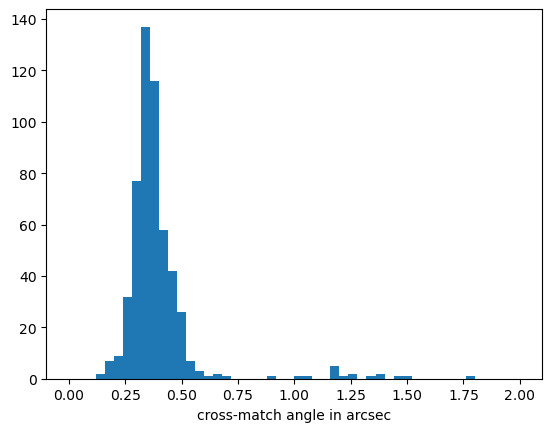

In [36]:
plt.hist(all_d2d,bins=50,range=(0,2));
plt.xlabel("cross-match angle in arcsec")

# Extract magnitudes

In [37]:
result_ptable["MAG_GAAP_u"].head()

0          NaN
1          NaN
2          NaN
3    24.936752
4    24.941830
Name: MAG_GAAP_u, dtype: float32

In [38]:
result_ptable["MAG_GAAP_g"].head()

0    24.149288
1    24.984371
2    24.543087
3    23.930965
4    24.455513
Name: MAG_GAAP_g, dtype: float32

In [39]:
result_ptable["MAG_GAAP_r"].head()

0    23.768167
1    23.894615
2    24.572063
3    24.052298
4    23.566183
Name: MAG_GAAP_r, dtype: float32

In [40]:
result_ptable["MAG_GAAP_i"].head()

0    23.232088
1    23.560923
2    24.403250
3    23.712200
4    23.421646
Name: MAG_GAAP_i, dtype: float32

In [41]:
result_ptable["MAG_GAAP_Z"].head()

0    23.635704
1    23.221949
2    26.101616
3    25.084373
4    23.127962
Name: MAG_GAAP_Z, dtype: float32

In [42]:
result_ptable["MAG_GAAP_Y"].head()

0    23.064671
1    22.790880
2    24.578526
3          NaN
4    23.152565
Name: MAG_GAAP_Y, dtype: float32

In [43]:
result_ptable["MAG_GAAP_J"].head()

0    22.556938
1    22.552475
2    22.265968
3    22.837746
4    21.874512
Name: MAG_GAAP_J, dtype: float32

In [44]:
result_ptable["MAG_GAAP_H"].head()

0    21.794752
1    23.273539
2    23.056099
3    22.576283
4    23.085169
Name: MAG_GAAP_H, dtype: float32

In [45]:
result_ptable["MAG_GAAP_Ks"].head()

0    22.376513
1    22.453671
2    25.546009
3          NaN
4    21.645115
Name: MAG_GAAP_Ks, dtype: float32

In [46]:
SelectedColumns = ["ID" ,"KIDS_TILE","RAJ2000","DECJ2000","FLUX_RADIUS","CLASS_STAR",
"MAG_GAAP_u","MAG_GAAP_g","MAG_GAAP_r","MAG_GAAP_i","MAG_GAAP_Z","MAG_GAAP_Y","Z_B","Z_ML","EXTINCTION_u","EXTINCTION_g","EXTINCTION_r","EXTINCTION_i"]

In [47]:
result_ptable= result_ptable[SelectedColumns]

In [48]:
result_ptable

,ID,KIDS_TILE,RAJ2000,DECJ2000,FLUX_RADIUS,CLASS_STAR,MAG_GAAP_u,MAG_GAAP_g,MAG_GAAP_r,MAG_GAAP_i,MAG_GAAP_Z,MAG_GAAP_Y,Z_B,Z_ML,EXTINCTION_u,EXTINCTION_g,EXTINCTION_r,EXTINCTION_i
0,KiDSDR4 J005347.585-283857.70,KIDS_13.5_-28.2,13.448272,-28.649362,3.074759,0.087846,NaN,24.149288,23.768167,23.232088,23.635704,23.064671,0.69,2.82,0.067433,0.052544,0.036350,0.027012
1,KiDSDR4 J005311.072-283857.09,KIDS_13.5_-28.2,13.296137,-28.649193,2.204050,0.024639,NaN,24.984371,23.894615,23.560923,23.221949,22.790880,0.52,0.19,0.066615,0.051906,0.035908,0.026684
2,KiDSDR4 J005325.757-283857.40,KIDS_13.5_-28.2,13.357325,-28.649280,1.996444,0.453629,NaN,24.543087,24.572063,24.403250,26.101616,24.578526,1.61,1.96,0.066055,0.051470,0.035607,0.026460
3,KiDSDR4 J005304.514-283856.87,KIDS_13.5_-28.2,13.268810,-28.649131,3.169912,0.644952,24.936752,23.930965,24.052298,23.712200,25.084373,NaN,1.89,2.54,0.066197,0.051580,0.035683,0.026516
4,KiDSDR4 J005450.518-283856.99,KIDS_13.5_-28.2,13.710493,-28.649166,2.547129,0.086659,24.941830,24.455513,23.566183,23.421646,23.127962,23.152565,0.28,0.24,0.092741,0.072263,0.049991,0.037149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29623,KiDSDR4 J005301.337-280922.65,KIDS_13.5_-28.2,13.255574,-28.156294,5.790458,0.765856,17.407341,15.914205,NaN,15.101517,14.930676,14.898466,0.05,0.05,0.099742,0.077718,0.053765,0.039953
29624,KiDSDR4 J005440.218-280935.40,KIDS_13.5_-28.2,13.667578,-28.159836,6.967954,0.840779,15.367549,NaN,NaN,NaN,13.792622,13.867051,0.01,0.01,0.078787,0.061390,0.042470,0.031560
29625,KiDSDR4 J005432.556-280907.23,KIDS_13.5_-28.2,13.635652,-28.152010,2.356473,0.865335,17.675791,16.507570,16.123501,15.940156,15.832415,15.832528,0.04,0.04,0.080823,0.062977,0.043567,0.032375
29626,KiDSDR4 J005324.762-280900.91,KIDS_13.5_-28.2,13.353177,-28.150255,2.142460,0.856969,17.644361,16.721621,16.421577,16.308752,16.205755,16.222517,0.01,0.01,0.101493,0.079083,0.054709,0.040655


## Create extended info dataframe

In [49]:
df_info_extended = pd.DataFrame(columns=SelectedColumns)

In [50]:
df_info_extended

,ID,KIDS_TILE,RAJ2000,DECJ2000,FLUX_RADIUS,CLASS_STAR,MAG_GAAP_u,MAG_GAAP_g,MAG_GAAP_r,MAG_GAAP_i,MAG_GAAP_Z,MAG_GAAP_Y,Z_B,Z_ML,EXTINCTION_u,EXTINCTION_g,EXTINCTION_r,EXTINCTION_i


In [51]:
N = len(df_info)
for index in range (N):
    index_kids_table = all_idx[index]
    df_info_extended.loc[index] = result_ptable.iloc[index_kids_table].values

In [52]:
df_info_extended

,ID,KIDS_TILE,RAJ2000,DECJ2000,FLUX_RADIUS,CLASS_STAR,MAG_GAAP_u,MAG_GAAP_g,MAG_GAAP_r,MAG_GAAP_i,MAG_GAAP_Z,MAG_GAAP_Y,Z_B,Z_ML,EXTINCTION_u,EXTINCTION_g,EXTINCTION_r,EXTINCTION_i
0,KiDSDR4 J005407.202-282652.18,KIDS_13.5_-28.2,13.530012,-28.447828,2.967994,0.042723,NaN,22.848028,21.570145,20.993923,20.622589,20.378963,0.64,0.65,0.072517,0.056505,0.03909,0.029048
1,KiDSDR4 J005406.135-282515.22,KIDS_13.5_-28.2,13.525566,-28.420897,3.020974,0.026643,23.346855,22.941315,21.863623,21.148308,20.749331,20.567509,0.76,0.76,0.075065,0.05849,0.040463,0.030069
2,KiDSDR4 J005400.531-282423.36,KIDS_13.5_-28.2,13.502216,-28.406491,2.671784,0.0414,NaN,23.450844,21.977757,21.55843,21.216759,21.236706,0.38,0.24,0.074299,0.057893,0.04005,0.029762
3,KiDSDR4 J005358.235-282258.04,KIDS_13.5_-28.2,13.492649,-28.38279,2.192928,0.577261,23.861921,23.616484,23.223907,23.105886,22.334183,23.365664,0.79,0.79,0.077572,0.060444,0.041815,0.031073
4,KiDSDR4 J005425.830-282604.52,KIDS_13.5_-28.2,13.607625,-28.434589,2.992076,0.087973,24.186991,23.808002,22.011513,21.487328,21.100159,20.862761,0.38,0.39,0.075642,0.05894,0.040774,0.0303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,KiDSDR4 J005443.393-281358.14,KIDS_13.5_-28.2,13.680807,-28.232817,3.462931,0.028894,22.124575,21.183992,20.361795,20.002121,19.714937,19.57863,0.16,0.15,0.073033,0.056906,0.039368,0.029254
546,KiDSDR4 J005447.902-281354.13,KIDS_13.5_-28.2,13.699594,-28.231703,3.587435,0.031675,23.698568,21.267984,19.724001,19.231585,18.867546,18.647512,0.4,0.4,0.072326,0.056356,0.038987,0.028971
547,KiDSDR4 J005439.434-281343.01,KIDS_13.5_-28.2,13.664309,-28.228614,4.769248,0.005216,23.172825,23.063156,22.264561,22.297144,21.720623,21.406158,0.55,0.56,0.074087,0.057728,0.039936,0.029677
548,KiDSDR4 J005430.535-281337.17,KIDS_13.5_-28.2,13.627233,-28.226992,2.864109,0.030425,23.499617,22.918249,21.776768,21.20969,20.798254,20.385408,0.7,0.7,0.079347,0.061827,0.042772,0.031784


In [53]:
df_info_extended["angularsep"] = all_d2d

## concatenate the pandas dataframe

- be carefull to have the indexes increasing from to to N (otherwise the merging is done on pandas dataframe index number)

In [54]:
df_info_concatenated = pd.concat([df_info, df_info_extended], axis=1)

In [55]:
df_info_concatenated

,num,ra,dec,Rmag,redshift,ID,KIDS_TILE,RAJ2000,DECJ2000,FLUX_RADIUS,...,MAG_GAAP_i,MAG_GAAP_Z,MAG_GAAP_Y,Z_B,Z_ML,EXTINCTION_u,EXTINCTION_g,EXTINCTION_r,EXTINCTION_i,angularsep
0,2,13.52997,-28.44776,21.18,0.34555,KiDSDR4 J005407.202-282652.18,KIDS_13.5_-28.2,13.530012,-28.447828,2.967994,...,20.993923,20.622589,20.378963,0.64,0.65,0.072517,0.056505,0.03909,0.029048,0.278569
1,3,13.52552,-28.42080,21.45,0.68660,KiDSDR4 J005406.135-282515.22,KIDS_13.5_-28.2,13.525566,-28.420897,3.020974,...,21.148308,20.749331,20.567509,0.76,0.76,0.075065,0.05849,0.040463,0.030069,0.378354
2,9,13.50219,-28.40641,21.60,0.29266,KiDSDR4 J005400.531-282423.36,KIDS_13.5_-28.2,13.502216,-28.406491,2.671784,...,21.55843,21.216759,21.236706,0.38,0.24,0.074299,0.057893,0.04005,0.029762,0.303000
3,13,13.49261,-28.38272,23.14,0.68870,KiDSDR4 J005358.235-282258.04,KIDS_13.5_-28.2,13.492649,-28.38279,2.192928,...,23.105886,22.334183,23.365664,0.79,0.79,0.077572,0.060444,0.041815,0.031073,0.280645
4,19,13.60758,-28.43452,21.70,0.48395,KiDSDR4 J005425.830-282604.52,KIDS_13.5_-28.2,13.607625,-28.434589,2.992076,...,21.487328,21.100159,20.862761,0.38,0.39,0.075642,0.05894,0.040774,0.0303,0.286350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,734,13.68083,-28.23290,0.00,0.23012,KiDSDR4 J005443.393-281358.14,KIDS_13.5_-28.2,13.680807,-28.232817,3.462931,...,20.002121,19.714937,19.57863,0.16,0.15,0.073033,0.056906,0.039368,0.029254,0.307576
546,735,13.69958,-28.23161,19.28,0.36169,KiDSDR4 J005447.902-281354.13,KIDS_13.5_-28.2,13.699594,-28.231703,3.587435,...,19.231585,18.867546,18.647512,0.4,0.4,0.072326,0.056356,0.038987,0.028971,0.337732
547,736,13.66431,-28.22849,21.64,0.55777,KiDSDR4 J005439.434-281343.01,KIDS_13.5_-28.2,13.664309,-28.228614,4.769248,...,22.297144,21.720623,21.406158,0.55,0.56,0.074087,0.057728,0.039936,0.029677,0.446411
548,737,13.62722,-28.22692,21.40,0.52001,KiDSDR4 J005430.535-281337.17,KIDS_13.5_-28.2,13.627233,-28.226992,2.864109,...,21.20969,20.798254,20.385408,0.7,0.7,0.079347,0.061827,0.042772,0.031784,0.262459


## Save file

In [56]:
outputfile = "info_fors2Kidscrossmatch.csv"

In [57]:
df_info_concatenated.to_csv(outputfile)